<a href="https://colab.research.google.com/github/shivanssharma/R-practicals/blob/main/Logistic_regression_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("caret", dependencies=TRUE)
install.packages("mlbench")  # Needed for PIMA dataset
install.packages("pROC")     # Needed for ROC Curve
install.packages("ggplot2")  # For visualization



install.packages("dplyr")
install.packages("tidyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘rbibutils’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘Rdpack’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘sparsevctrs’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘proxy’

In [2]:
# Load necessary libraries
library(caret)
library(pROC)
library(ggplot2)
library(dplyr)
library(tidyr)

# Load the PIMA dataset
data(PimaIndiansDiabetes, package = "mlbench")

Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Diabetes Dataset

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Atributes(Columns)
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [3]:
# Get the number of records (rows)
num_records <- nrow(PimaIndiansDiabetes)

# Print the number of records
print(num_records)


table(PimaIndiansDiabetes$diabetes)

[1] 768



neg pos 
500 268 

In [4]:
# Get summary statistics (equivalent to data.describe() in Python)
summary(PimaIndiansDiabetes)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            


## Proportions

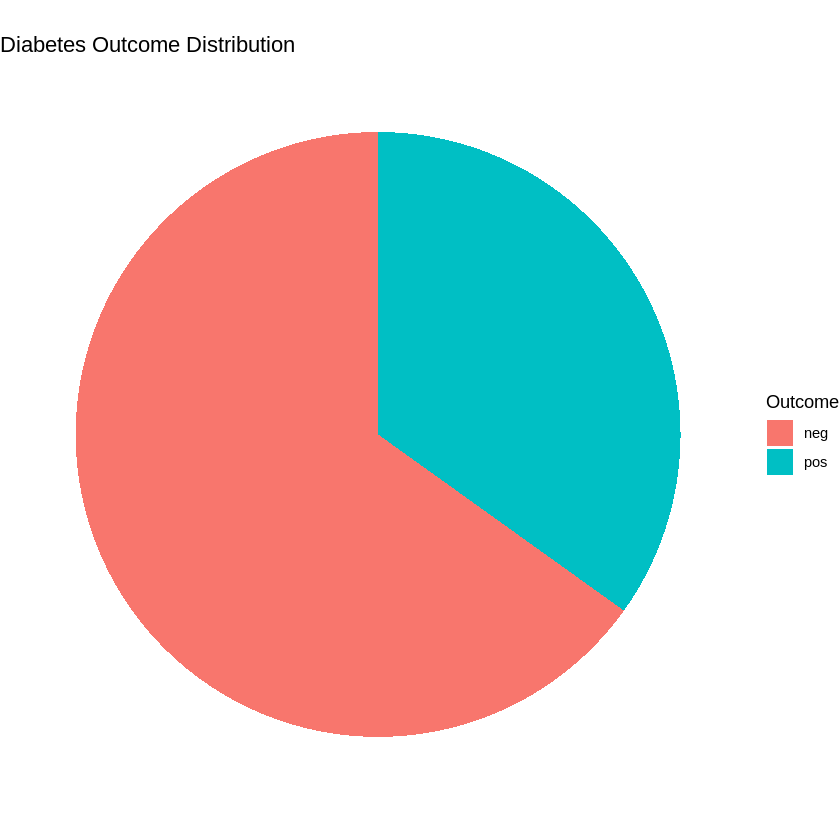

In [5]:
# Compute proportions of outcome values (Diabetes vs No Diabetes)
target <- prop.table(table(PimaIndiansDiabetes$diabetes))

# Convert to a dataframe for visualization
target_df <- as.data.frame(target)
colnames(target_df) <- c("Outcome", "Proportion")

# Plot the pie chart
ggplot(target_df, aes(x = "", y = Proportion, fill = Outcome)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  theme_void() +
  ggtitle("Diabetes Outcome Distribution")

## Data Visualization

## Distribution Plots

In [6]:
# Convert Outcome to a factor for visualization
PimaIndiansDiabetes$diabetes <- factor(PimaIndiansDiabetes$diabetes,
                                       levels = c("neg", "pos"),
                                       labels = c("Healthy", "Diabetic"))
# Modified function for better visualization
compare_dist_by_target <- function(features, data) {
  for (feature in features) {
    # Create histogram with density overlay
    p <- ggplot(data, aes_string(x = feature, fill = "diabetes")) +
      geom_histogram(aes(y = ..count..), alpha = 0.4, bins = 20, position = "identity", color = "black") +
      geom_density(aes(y = ..count.., color = diabetes), size = 1,fill = NA) +
      scale_fill_manual(values = c("Healthy" = "green", "Diabetic" = "red")) +  # Matching colors
      scale_color_manual(values = c("Healthy" = "green", "Diabetic" = "red")) +  # KDE curve colors
      labs(title = paste(feature, "distplot for Diabetic vs Healthy"),
           x = feature, y = "Count") +
      theme_minimal(base_size = 14) +
      theme(legend.position = "top",
            legend.title = element_blank(),
            plot.title = element_text(hjust = 0.5, face = "bold"))

    # Print the plot
    print(p)
  }
}

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


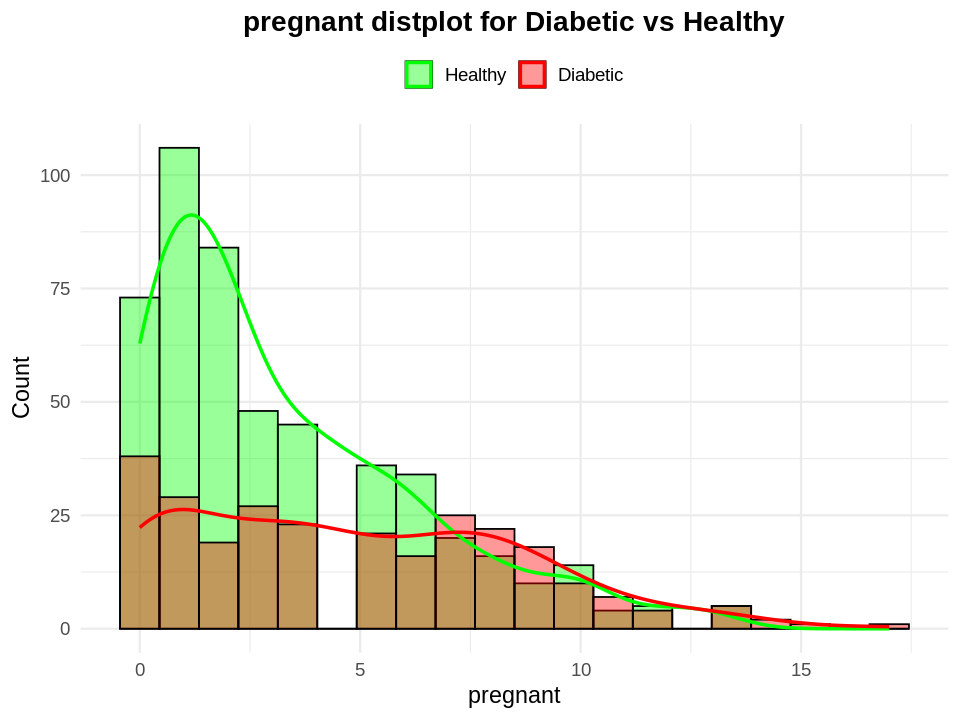

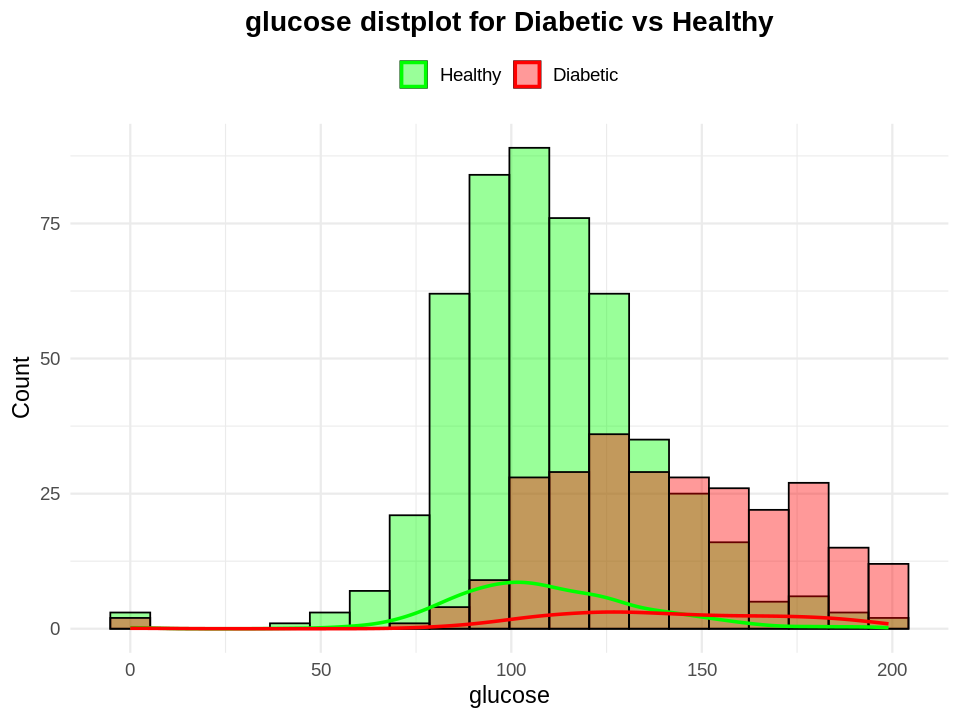

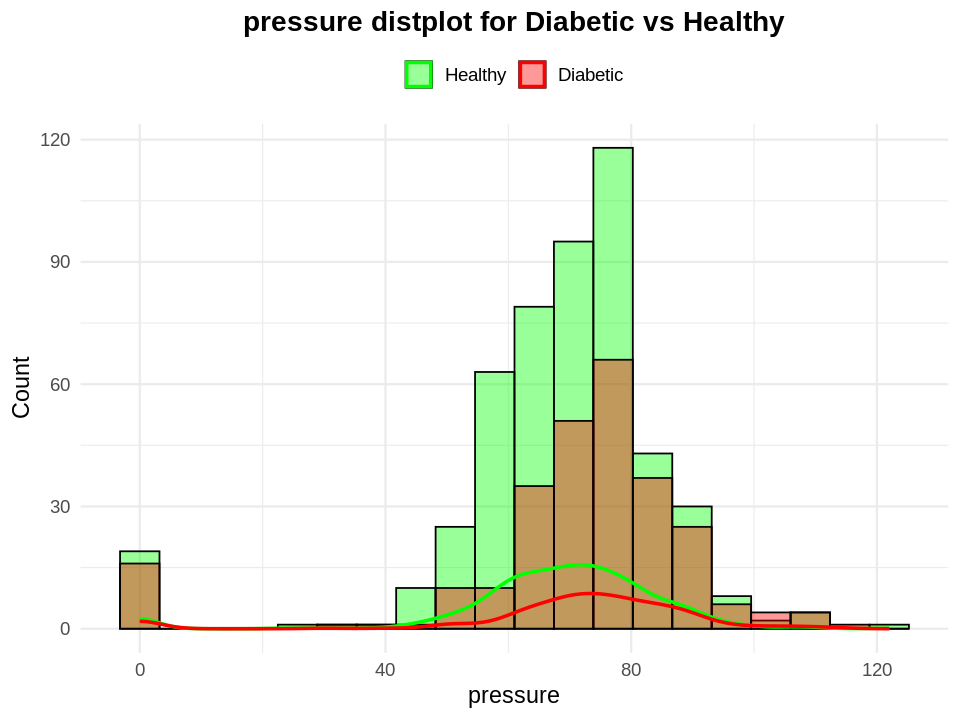

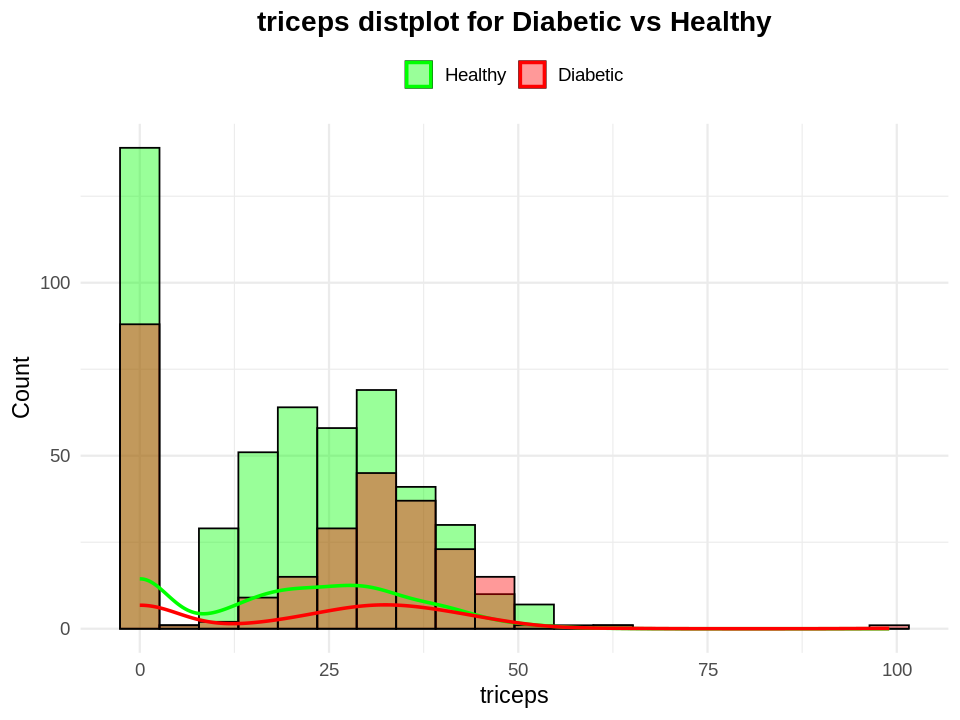

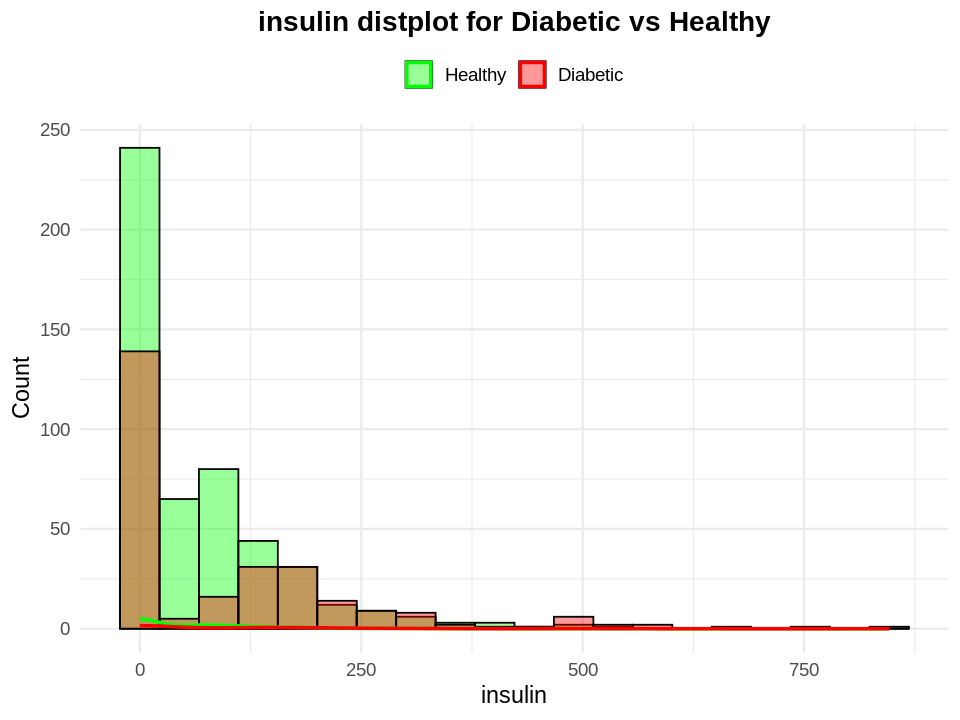

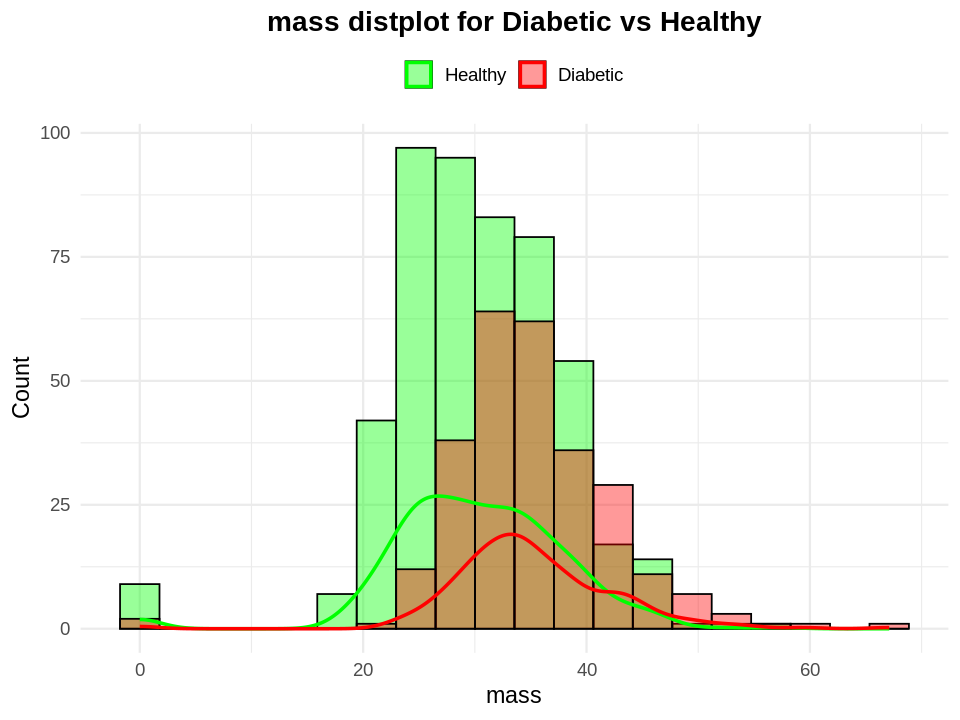

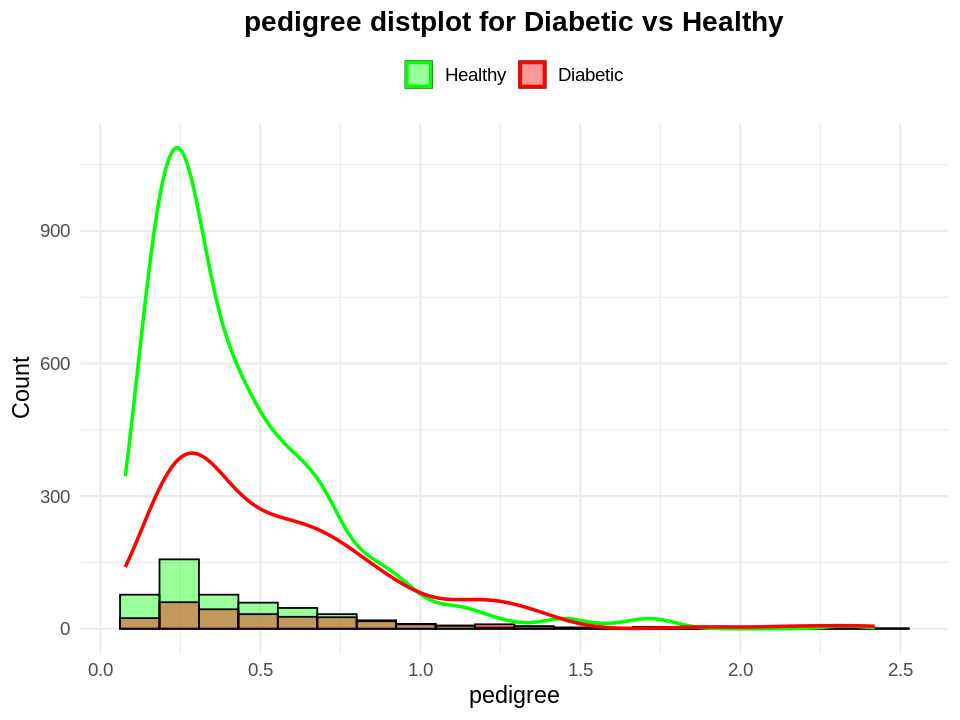

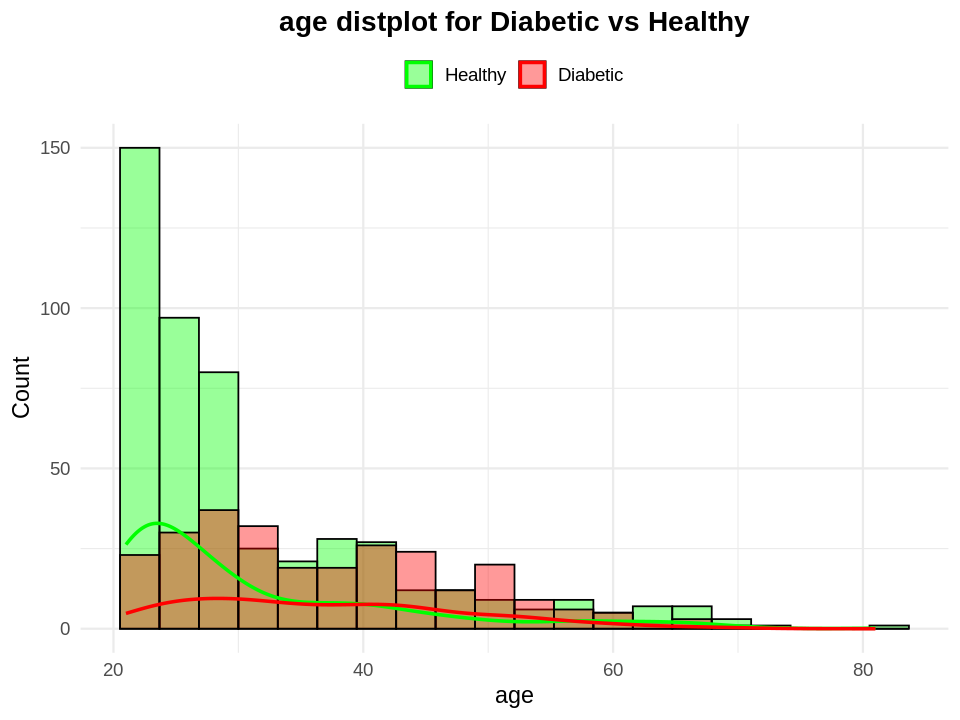

In [7]:
# Increase plot size
options(repr.plot.width = 8, repr.plot.height = 6)

# Get all feature names excluding 'diabetes' (Outcome)
features <- setdiff(names(PimaIndiansDiabetes), "diabetes")

# Call the function for visualization
compare_dist_by_target(features, PimaIndiansDiabetes)

## Are there any missing values ?

In [8]:
# python - data.isna().sum()
# Check for missing values in each column
colSums(is.na(PimaIndiansDiabetes))

pregnant  glucose pressure  triceps  insulin     mass pedigree      age 
       0        0        0        0        0        0        0        0 
diabetes 
       0

## Logistic Regression





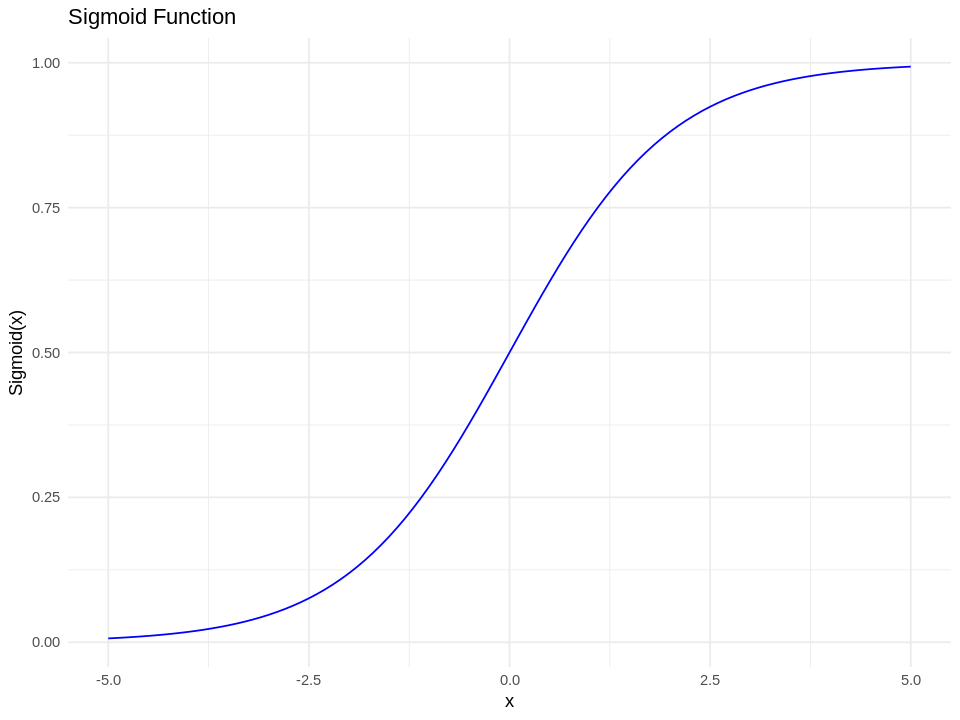

In [9]:
# Defining the sigmoid function
sigmoid <- function(x) {
  return (1 / (1 + exp(-x)))
}

# Generate inputs from -5 to 5
x <- seq(-5, 5, by = 0.1)

# Apply the sigmoid function
sig <- sigmoid(x)

# Create a data frame for plotting
df <- data.frame(x = x, sigmoid = sig)

# Plot using ggplot2
ggplot(df, aes(x = x, y = sigmoid)) +
  geom_line(color = "blue") +
  ggtitle("Sigmoid Function") +
  xlab("x") +
  ylab("Sigmoid(x)") +
  theme_minimal()


In [10]:
# Display the first 6 rows of the dataset (default)
head(PimaIndiansDiabetes)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,Diabetic
2,1,85,66,29,0,26.6,0.351,31,Healthy
3,8,183,64,0,0,23.3,0.672,32,Diabetic
4,1,89,66,23,94,28.1,0.167,21,Healthy
5,0,137,40,35,168,43.1,2.288,33,Diabetic
6,5,116,74,0,0,25.6,0.201,30,Healthy


## Correlation Plot - One of the Best Practices

In [13]:
install.packages("ggcorrplot")
library(ggcorrplot)

# Compute correlation matrix
cor_matrix <- cor(PimaIndiansDiabetes[, sapply(PimaIndiansDiabetes, is.numeric)], use = "complete.obs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



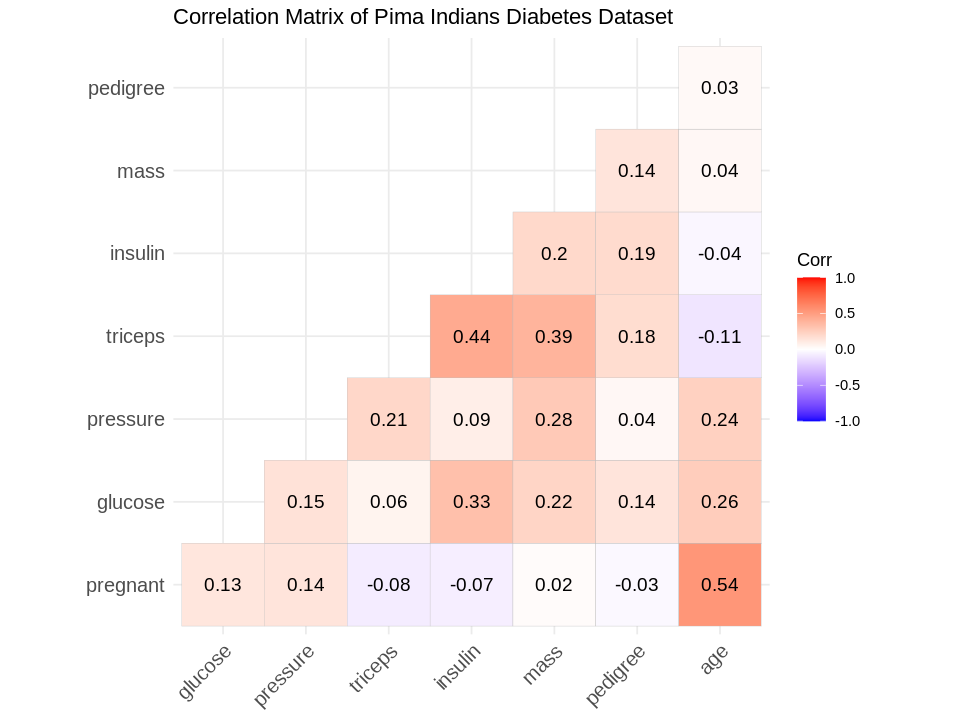

In [14]:
# Create a professional-looking heatmap (Lower Triangle)
ggcorrplot(cor_matrix, method = "square", type = "lower",
           colors = c("blue", "white", "red"),  # Blue for negative, red for positive
           lab = TRUE,  # Show correlation values
           lab_size = 4,  # Increase text size
           title = "Correlation Matrix of Pima Indians Diabetes Dataset",
           ggtheme = theme_minimal())


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




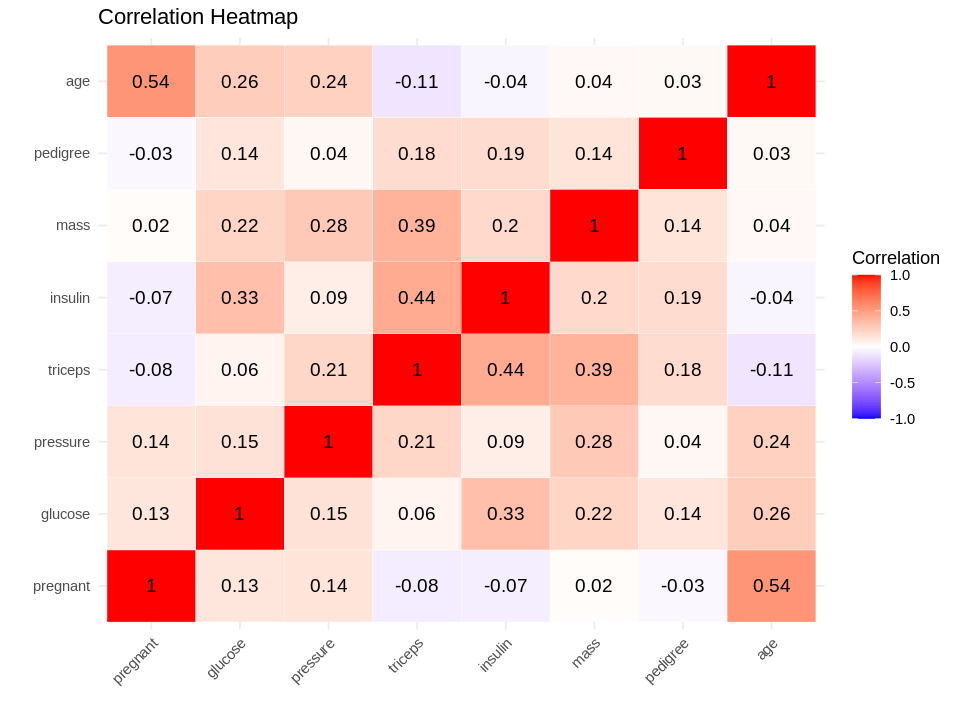

In [15]:
library(reshape2)

# Compute correlation matrix
cor_matrix <- cor(PimaIndiansDiabetes[, sapply(PimaIndiansDiabetes, is.numeric)], use = "complete.obs")

# Convert matrix to long format
cor_long <- melt(cor_matrix)

# Heatmap with professional styling
ggplot(cor_long, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +  # White gridlines for better separation
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0,
                       limit = c(-1,1), space = "Lab", name="Correlation") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) +  # Add text labels
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  labs(title = "Correlation Heatmap", x = "", y = "")

In [19]:
trainIndex <- createDataPartition(PimaIndiansDiabetes$diabetes, p = 0.7, list = FALSE)
trainData <- PimaIndiansDiabetes[trainIndex, ]
testData <- PimaIndiansDiabetes[-trainIndex, ]

# Check class distribution in train and test
table(trainData$diabetes)
table(testData$diabetes)

dim(trainData)  # Check training data dimensions
dim(testData)   # Check testing data dimensions



 Healthy Diabetic 
     350      188 


 Healthy Diabetic 
     150       80 

[1] 538   9

[1] 230   9

## Train a logistic regression model

In [20]:
logit_model <- glm(diabetes ~ ., data = trainData, family = binomial)
predictions <- predict(logit_model, testData, type = "response")  # Get probabilities
pred_class <- ifelse(predictions > 0.5, "Diabetic", "Healthy")  # Convert probabilities to class labels

table(pred_class)  # Check if all predictions are same
table(testData$diabetes, pred_class)

table(trainData$diabetes)

pred_class
Diabetic  Healthy 
      69      161 

          pred_class
           Diabetic Healthy
  Healthy        17     133
  Diabetic       52      28


 Healthy Diabetic 
     350      188 

## Build the model

In [21]:
# Train a logistic regression model
logit_model <- glm(diabetes ~ ., data = trainData, family = binomial)
table(trainData$diabetes)


 Healthy Diabetic 
     350      188 

In [22]:
# Predict on test data
pred_prob <- predict(logit_model, testData, type = "response")
# pred_class <- ifelse(pred_prob > 0.5, "pos", "neg")
# pred_class <- ifelse(predictions > 0.5, "Diabetic","Healthy")
pred_class <- ifelse(pred_prob > 0.5, "Diabetic", "Healthy")
pred_class <- factor(pred_class, levels = c("Healthy", "Diabetic"))

In [23]:
actual_class <- factor(testData$diabetes, levels = c("Healthy", "Diabetic"))

In [24]:
# Generate a confusion matrix
conf_matrix <- confusionMatrix(pred_class, actual_class)
print(conf_matrix)

Confusion Matrix and Statistics

          Reference
Prediction Healthy Diabetic
  Healthy      133       28
  Diabetic      17       52
                                          
               Accuracy : 0.8043          
                 95% CI : (0.7471, 0.8536)
    No Information Rate : 0.6522          
    P-Value [Acc > NIR] : 2.954e-07       
                                          
                  Kappa : 0.5545          
                                          
 Mcnemar's Test P-Value : 0.136           
                                          
            Sensitivity : 0.8867          
            Specificity : 0.6500          
         Pos Pred Value : 0.8261          
         Neg Pred Value : 0.7536          
             Prevalence : 0.6522          
         Detection Rate : 0.5783          
   Detection Prevalence : 0.7000          
      Balanced Accuracy : 0.7683          
                                          
       'Positive' Class : Healthy         
   

## Confusion Matrix

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



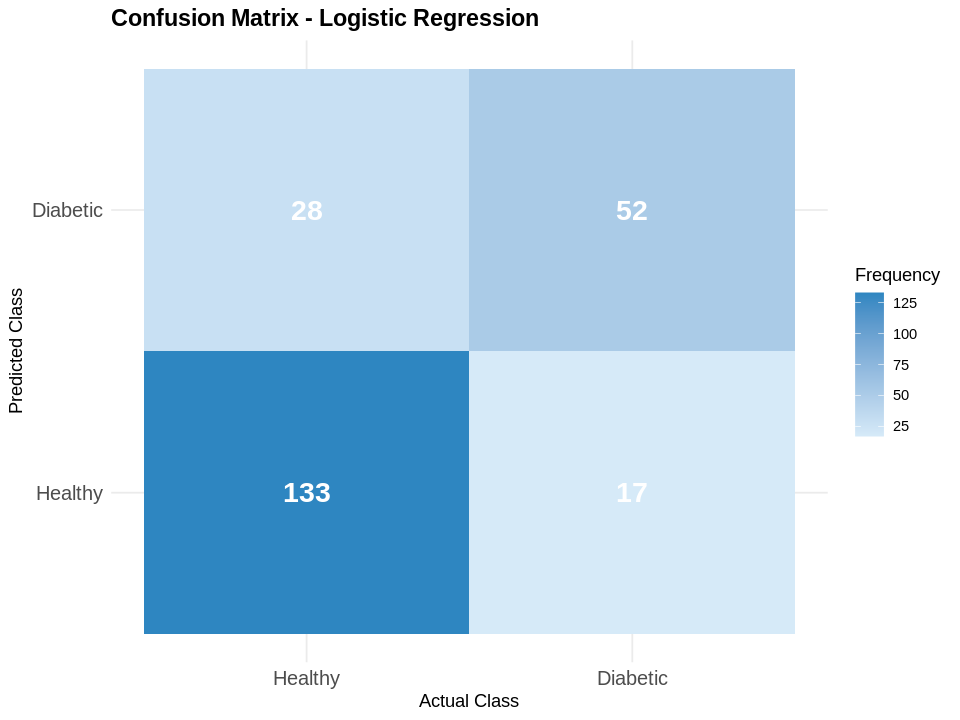

In [26]:
install.packages("pheatmap")
library(pheatmap)

# Generate the confusion matrix again (if needed)
conf_mat_table <- as.data.frame(conf_matrix$table)
colnames(conf_mat_table) <- c("Reference", "Prediction", "Frequency")

# Define professional color palette
professional_colors <- scale_fill_gradient(low = "#D6EAF8", high = "#2E86C1") # Light to dark blue

# Professional Confusion Matrix Plot
ggplot(conf_mat_table, aes(x = Reference, y = Prediction, fill = Frequency)) +
  geom_tile() +
  geom_text(aes(label = Frequency), color = "white", size = 6, fontface = "bold") +
  professional_colors +
  labs(title = "Confusion Matrix - Logistic Regression",
       x = "Actual Class",
       y = "Predicted Class") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14),
        axis.text = element_text(size = 12),
        legend.position = "right")


## Color Brewer

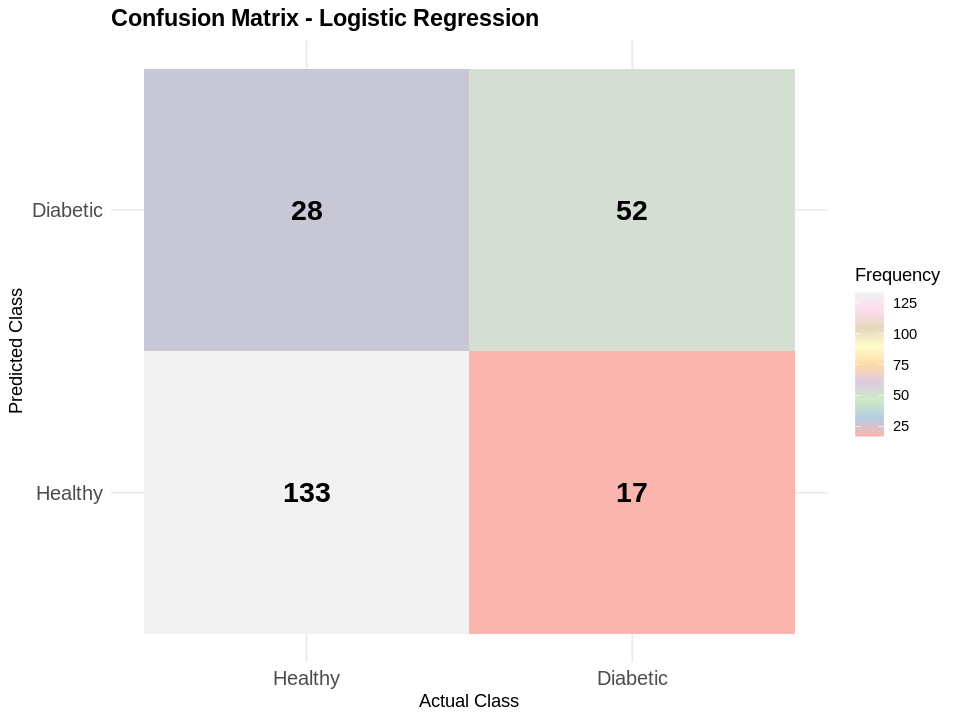

In [29]:
library(RColorBrewer)
# Define pastel colors using RColorBrewer
pastel_colors <- scale_fill_gradientn(colors = brewer.pal(9, "Pastel1"))

# Generate the confusion matrix again (if needed)
conf_mat_table <- as.data.frame(conf_matrix$table)
colnames(conf_mat_table) <- c("Reference", "Prediction", "Frequency")

# Plot Confusion Matrix with Pastel Colors
ggplot(conf_mat_table, aes(x = Reference, y = Prediction, fill = Frequency)) +
  geom_tile() +
  geom_text(aes(label = Frequency), color = "black", size = 6, fontface = "bold") + # Black text for better contrast
  pastel_colors +
  labs(title = "Confusion Matrix - Logistic Regression",
       x = "Actual Class",
       y = "Predicted Class") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14),
        axis.text = element_text(size = 12),
        legend.position = "right")

## How good is the Model ?  check AUC Value.

Setting levels: control = Healthy, case = Diabetic

Setting direction: controls < cases



[1] "AUC: 0.86"


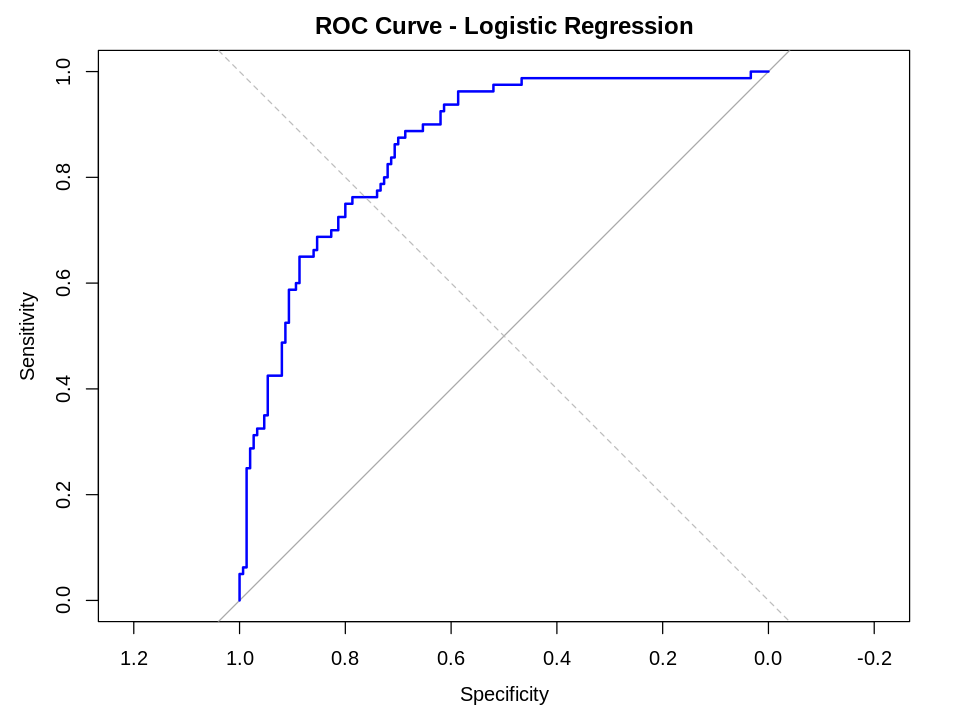

In [30]:
library(pROC)    # For ROC curve and AUC
# Generate ROC curve data
roc_curve <- roc(testData$diabetes, pred_prob)

# Plot ROC Curve using base plot
plot(roc_curve, col = "blue", lwd = 2, main = "ROC Curve - Logistic Regression")
abline(a=0, b=1, lty=2, col="gray")  # Add diagonal reference line

# Display AUC (Area Under Curve) - Determines Model performance
auc_value <- auc(roc_curve)
print(paste("AUC:", round(auc_value, 3)))


## What is the recommended threshold for probability value ?

In [31]:

thresholds <- seq(0.1, 0.9, by = 0.05)

# Function to calculate F1 score
calculate_f1 <- function(threshold) {
  pred_class <- ifelse(pred_prob > threshold, "Diabetic", "Healthy")
  pred_class <- factor(pred_class, levels = c("Healthy", "Diabetic"))

  actual_class <- factor(testData$diabetes, levels = c("Healthy", "Diabetic"))

  conf_matrix <- confusionMatrix(pred_class, actual_class)

  precision <- conf_matrix$byClass["Precision"]
  recall <- conf_matrix$byClass["Recall"]

  f1 <- 2 * ((precision * recall) / (precision + recall))
  return(f1)
}

# Compute F1 scores for different thresholds
f1_scores <- sapply(thresholds, calculate_f1)

# Find the best threshold
best_threshold <- thresholds[which.max(f1_scores)]
best_f1 <- max(f1_scores)

# Print the best threshold and its F1-score
cat("Best Threshold:", best_threshold, "\nBest F1 Score:", best_f1, "\n")

Best Threshold: 0.5 
Best F1 Score: 0.8553055 


## Best Probability Threshold

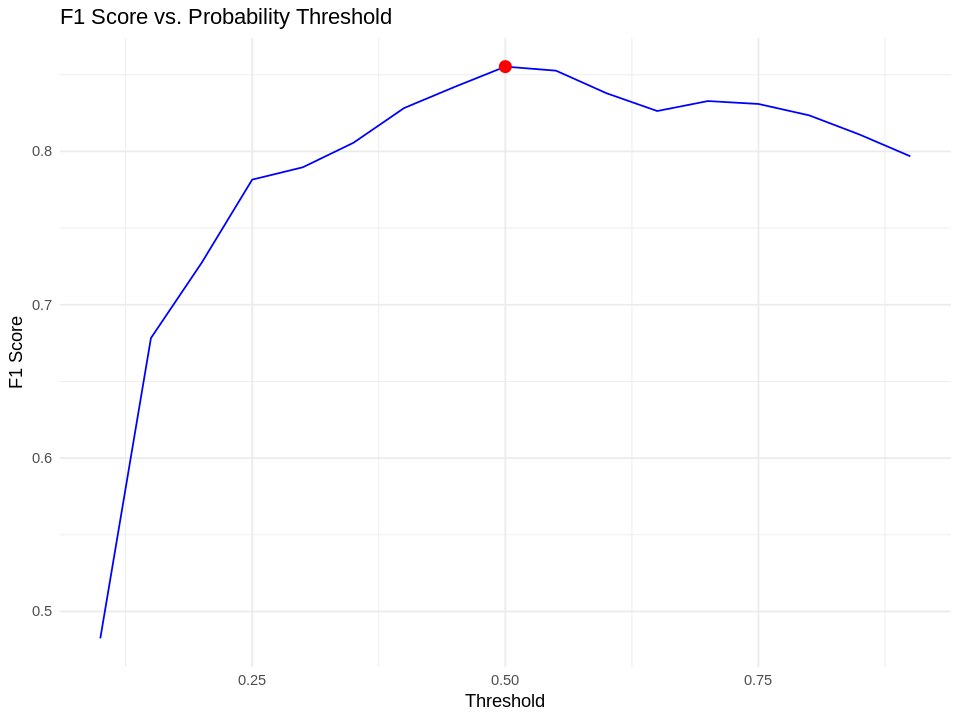

In [32]:
# Plot Threshold vs. F1 Score
f1_df <- data.frame(Threshold = thresholds, F1_Score = f1_scores)

ggplot(f1_df, aes(x = Threshold, y = F1_Score)) +
  geom_line(color = "blue") +
  geom_point(data = data.frame(Threshold = best_threshold, F1_Score = best_f1),
             aes(x = Threshold, y = F1_Score), color = "red", size = 3) +
  ggtitle("F1 Score vs. Probability Threshold") +
  xlab("Threshold") + ylab("F1 Score") +
  theme_minimal()